In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
print('Libraries imported.')

Libraries imported.


In [7]:
url = '/content/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


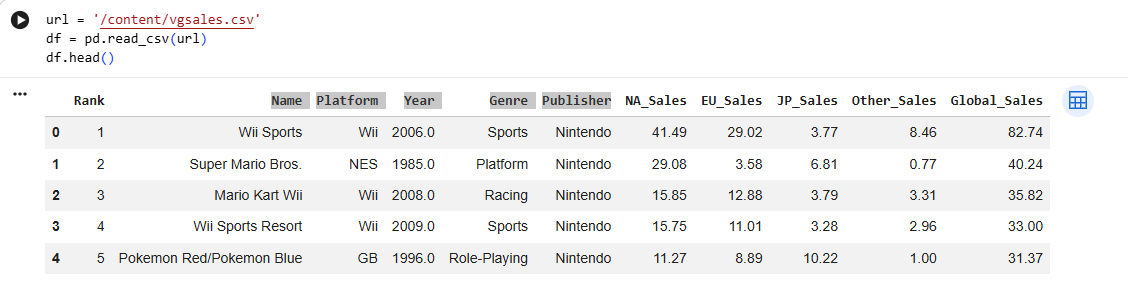

In [8]:
print('Shape:', df.shape)
print('\nColumn Names:', df.columns.tolist())
df.head()

Shape: (16598, 11)

Column Names: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


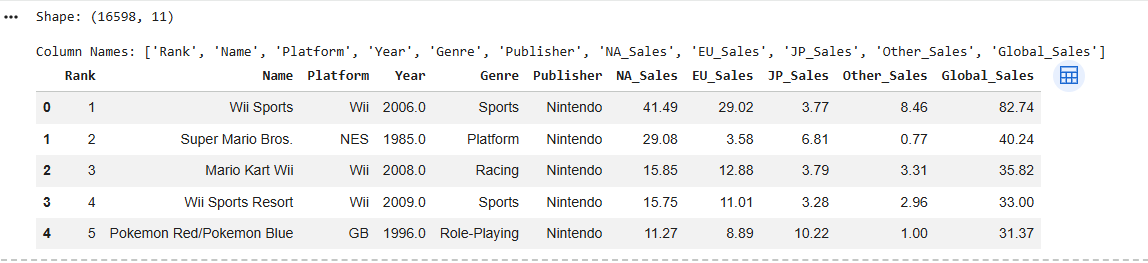

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


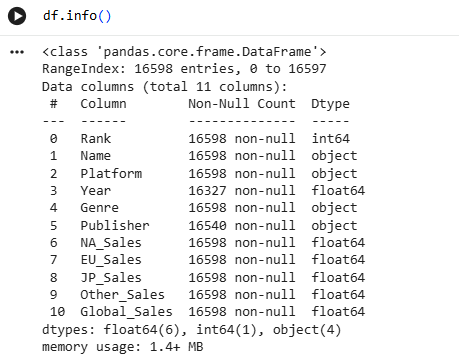

In [10]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


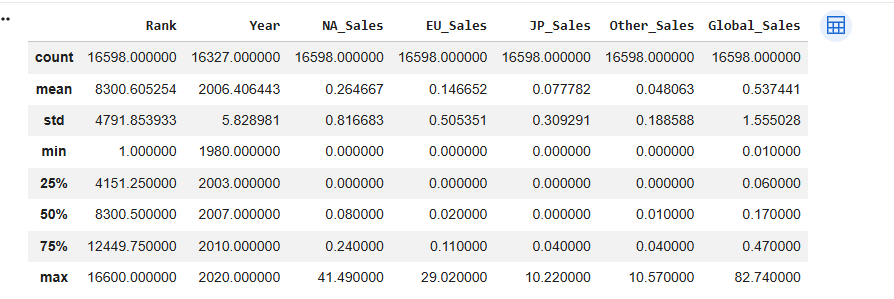

In [11]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


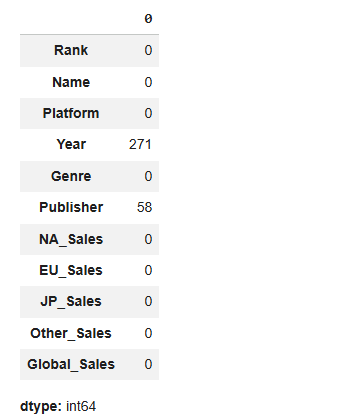

In [12]:
# Example strategy: fill numeric columns with mean
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-1648347935.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1648347935.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


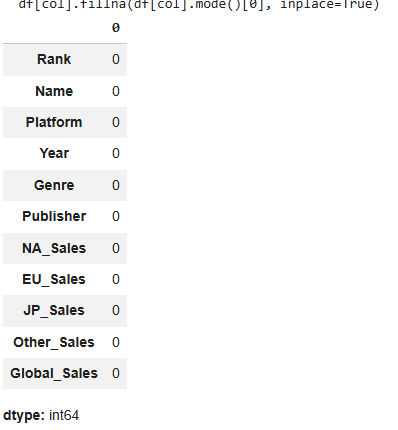

In [13]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print('Duplicates removed:', before - after)

Duplicates removed: 0


In [16]:
scaler = StandardScaler()
cols =['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,-0.070306,Sports,Nintendo,50.480508,57.136930,11.938058,44.606085,52.864025
1,2,Super Mario Bros.,NES,-3.702882,Platform,Nintendo,35.284437,6.794188,21.767296,3.828224,25.532503
2,3,Mario Kart Wii,Wii,0.275653,Racing,Nintendo,19.084273,25.197785,12.002724,17.297115,22.690025
3,4,Wii Sports Resort,Wii,0.448633,Sports,Nintendo,18.961823,21.497277,10.353740,15.441165,20.876498
4,5,Pokemon Red/Pokemon Blue,GB,-1.800104,Role-Playing,Nintendo,13.476053,17.302048,32.792857,5.047848,19.828254


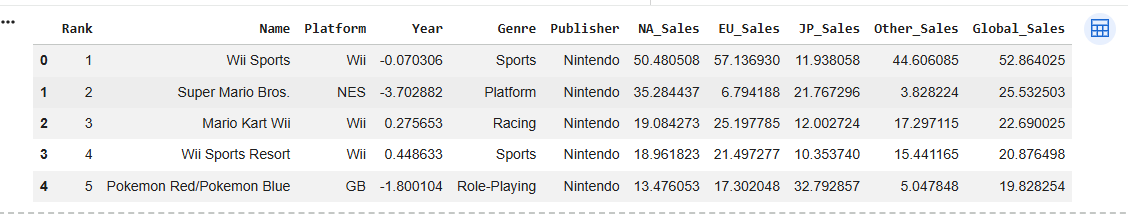

In [17]:
df.to_csv('assignment2_cleaned_sales.csv', index=False)
print('Saved: assignment2_sales_iris.csv')

Saved: assignment2_sales_iris.csv


Conclusion

In this experiment, we successfully performed essential data preprocessing and cleaning on the Video Game Sales (vgsales) dataset to make it more suitable for analysis and machine learning tasks. We explored the dataset by examining its shape, structure, and statistical summary, which helped in understanding its characteristics. Missing values in numerical columns were handled by replacing them with mean values, and duplicate records were removed to maintain data integrity. Further, important numerical features related to sales and year were standardized using StandardScaler to ensure uniform scaling across variables. Finally, the cleaned and preprocessed dataset was saved for future analysis. Overall, this experiment improved the quality, consistency, and usability of the dataset for further analytical or predictive modeling purposes.